In [1]:
# 0. 사용할 패키지 불러오기
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
width = 28
height = 28

In [3]:
# 1. 데이터셋 생성하기

In [4]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [5]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [6]:
# 데이터셋 전처리 : one-hot 인코딩
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

In [7]:
# 2. 모델 구성하기
input_layer = keras.layers.Input(shape=(width*height, ), dtype='float32', name='image_input')
dense_layer1 = keras.layers.Dense(units=256, activation='relu', name='dense_1')(input_layer)
dense_layer2 = keras.layers.Dense(units=256, activation='relu', name='dense_2')(dense_layer1)
output_layer = keras.layers.Dense(units=10, activation='softmax', name='label_output')(dense_layer2)

model = keras.models.Model(inputs={'image_input': input_layer}, outputs={'label_output':output_layer}, name="mnist_classification_model")
model.summary()

Model: "mnist_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
label_output (Dense)         (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# 4. 모델 학습시키기
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

checkpointer = keras.callbacks.ModelCheckpoint(filepath = model_dir + 'mnist_mlp.h5', monitor='val_loss', verbose=1, save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(x_train, y_train, epochs=32, batch_size=32, validation_data=(x_val, y_val), callbacks=[checkpointer, early_stop])

Epoch 1/32
1556/1563 [============================>.] - ETA: 0s - loss: 0.6531 - accuracy: 0.8354
Epoch 00001: val_loss improved from inf to 0.31305, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6521 - accuracy: 0.8356 - val_loss: 0.3130 - val_accuracy: 0.9137
Epoch 2/32
1552/1563 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.9133
Epoch 00002: val_loss improved from 0.31305 to 0.25229, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.9135 - val_loss: 0.2523 - val_accuracy: 0.9292
Epoch 3/32
1560/1563 [============================>.] - ETA: 0s - loss: 0.2485 - accuracy: 0.9287
Epoch 00003: val_loss improved from 0.25229 to 0.21116, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9287 - val_loss: 0.2112 - val_accuracy: 0.9384
Epoch 4/32
1559/1563 [==========

1562/1563 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9906
Epoch 00026: val_loss improved from 0.08303 to 0.08208, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0388 - accuracy: 0.9906 - val_loss: 0.0821 - val_accuracy: 0.9763
Epoch 27/32
1553/1563 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9906
Epoch 00027: val_loss improved from 0.08208 to 0.08085, saving model to ./model\mnist_mlp.h5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0366 - accuracy: 0.9906 - val_loss: 0.0808 - val_accuracy: 0.9762
Epoch 28/32
1562/1563 [============================>.] - ETA: 0s - loss: 0.0346 - accuracy: 0.9918
Epoch 00028: val_loss did not improve from 0.08085
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0346 - accuracy: 0.9918 - val_loss: 0.0810 - val_accuracy: 0.9768
Epoch 29/32
1549/1563 [============================>.] - ETA: 0s - loss: 0.0329

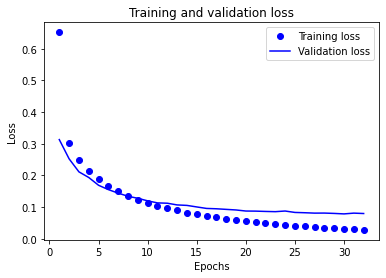

In [10]:
# 5. 학습과정 살펴보기
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

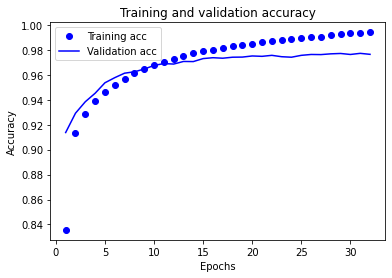

In [11]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# 6. 모델 평가하기
test_loss, test_acc = model.evaluate(x={'image_input':x_test}, y={'label_output':y_test}, batch_size=32)
print(f'test_loss={test_loss}, test_acc={test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9780
test_loss=0.07252529263496399, test_acc=0.9779999852180481


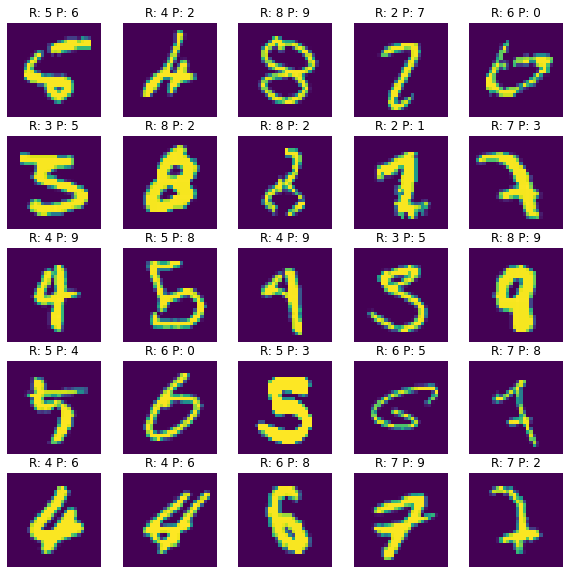

In [13]:
# 7. 모델 사용하기
yhat_test = model.predict(x={'image_input':x_test}, batch_size=32)['label_output']

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()